In [ ]:
import numpy as np
import pandas as pd
import time

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from sklearn.model_selection import train_test_split
import re
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
with open("/Data/viettel_train_input.txt","r",encoding='UTF-8') as f:
  X_train=f.read().splitlines()
with open("/Data/viettel_test_input.txt","r",encoding='UTF-8') as f:
  X_test=f.read().splitlines()
with open("/Data/viettel_train_label.txt","r",encoding='UTF-8') as f:
  y_train=f.read().splitlines()
with open("/Data/viettel_test_label.txt","r",encoding='UTF-8') as f:
  y_test=f.read().splitlines()

In [ ]:
params={
    'clf__kernel': ['linear','rbf'], 
    'clf__C': [1, 2] }
pipeline =  Pipeline([('vect', CountVectorizer(max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                      ('clf', SVC())])
grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(params)
t0 = time.time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
                    


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2)), 'clf__kernel': ['linear'], 'clf__C': [1, 2], 'clf__gamma': [0.125, 0.25]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: ignored

In [ ]:
pipeline =  Pipeline([('vect', CountVectorizer(max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='linear', C = 1))])
pipeline.fit(X_train,y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear'))])

In [ ]:
import time
import pickle
start_time=time.time()
logits=pipeline.predict(X_test)
print("Inference in {} seconds".format((time.time()-start_time)/len(X_test)))
def evaluate(logit,y_true):
  n=0
  for pred,true_label in zip(logit,y_true):
    if pred==true_label:
      n+=1
  return n/len(logit)
print(evaluate(logits,y_test))
filename = 'svm_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

Inference in 0.0035953414407133067 seconds
0.9508310249307479


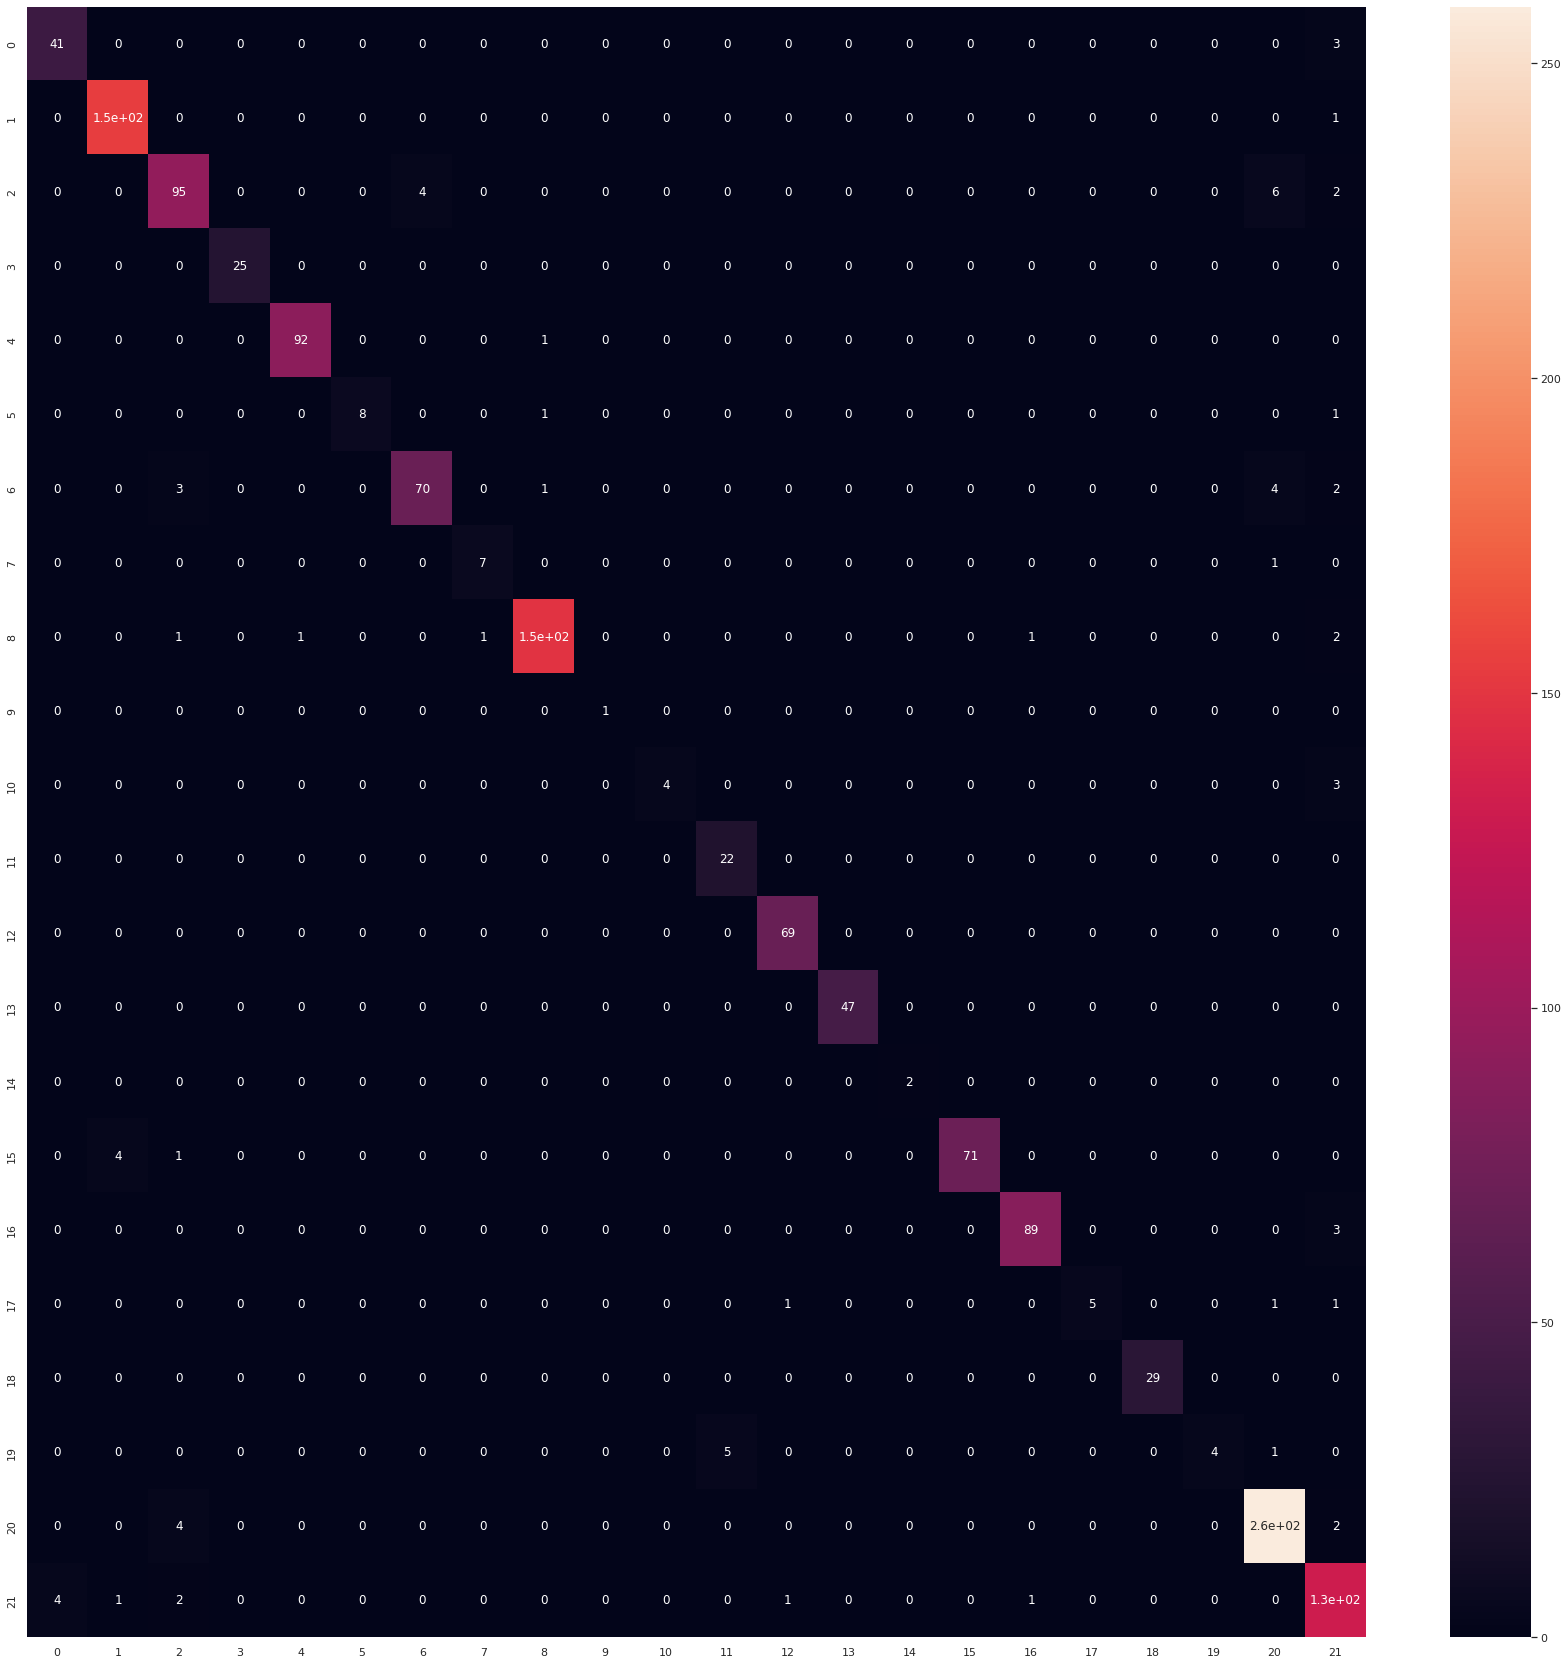

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cnf_matrix = confusion_matrix(y_test, logits)
plt.figure(figsize=(30,30))
sn.set(font_scale=1) # for label size
ax=sn.heatmap(cnf_matrix,annot=True) 
plt.show()